In [25]:
import pandas as pd

In [26]:

df = pd.read_csv('recons-our-bma.csv')


In [27]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
9995,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...,GCATGATTTGGAAGGTCGGCACTATACCCACCCAGGGTATATGGTC...
9996,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...,GAAGTTTGGAACGTGTTCGTCCGCCAATTAAGGTTGGCTTCTAGTA...
9997,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...,TGCATCCCGGACAACCGCAAGGGTGCATGGGCACCGCAATTCCCAA...
9998,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...,ACTGGACGTCCTATGCTGGCATAATGAAACGACAACCTGTCTTCGA...


In [28]:
from tqdm import tqdm


In [29]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [30]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [31]:
import difflib


In [32]:
def print_diff(ref_strand, recons_strand):
    global pairs
    global pairs_no_pos
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = recons_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            pairs_no_pos += [(was, now)]


            
        
    #print('')


In [33]:
# AGCT
# TAGC

# SM: (0, _ -> T), (4, _ -> T)
# Prof: (0, 1, 2, 3)

count_pos = [0] * 5
def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1
print_diff2("AGCT", "TAGC")
print(count_pos)

ref_strand = "AGCT"
recons_strand = "TAGC"
a = 0
b = 0
for match in difflib.SequenceMatcher(None, ref_strand, recons_strand, autojunk=False).get_matching_blocks():
    was = ref_strand[a:match.a]
    now = recons_strand[b:match.b]

    a = match.a + match.size
    b = match.b + match.size

    print(match, was, now, match.a)


    if was == '' and now == '':
        pass
    else:
        pass
        # print('{}|{}'.format(was, now), end=', ')
        # pairs += [(was, now, match.a)]
        # pairs_no_pos += [(was, now)]


[1, 1, 1, 1, 0]
Match(a=0, b=1, size=3)  T 0
Match(a=4, b=4, size=0) T  4


100%|██████████| 10000/10000 [00:00<00:00, 500848.30it/s]

[0, 10, 14, 12, 12, 14, 19, 16, 20, 20, 23, 24, 17, 22, 23, 28, 30, 28, 31, 30, 31, 34, 34, 33, 40, 43, 46, 44, 47, 45, 49, 46, 50, 53, 54, 62, 50, 51, 63, 69, 68, 62, 65, 71, 77, 70, 77, 74, 75, 79, 83, 67, 84, 77, 457, 445, 453, 436, 440, 469, 452, 440, 451, 436, 444, 436, 436, 420, 433, 427, 423, 444, 420, 412, 412, 423, 411, 438, 411, 405, 426, 418, 421, 424, 396, 404, 395, 384, 398, 373, 392, 396, 399, 388, 394, 383, 371, 375, 379, 375, 366, 383, 395, 384, 384, 380, 381, 461, 215, 226, 0]


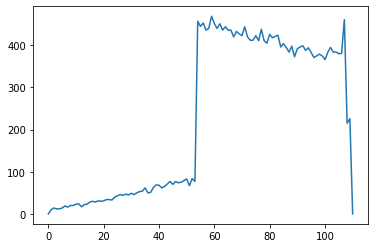

In [34]:
strand_len = 110
count_pos = [0] * (strand_len + 1)

def print_diff2(ref_strand, recons_strand):
    for i, (c1, c2) in enumerate(zip(ref_strand, recons_strand)):
        if c1 != c2:
            count_pos[i] += 1

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff2(ref_strands[i], noisy_strands[i])

import matplotlib.pyplot as plt
plt.plot(range(strand_len + 1), count_pos)
print(count_pos)


In [35]:
import numpy as np


In [36]:
pairs = []
pairs_no_pos = []
for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])

100%|██████████| 10000/10000 [00:00<00:00, 10656.55it/s]


In [37]:
subs_no_pos, counts_no_pos = np.unique(pairs_no_pos, return_counts=True, axis=0)
sorting = np.argsort(counts_no_pos)
subs_no_pos = subs_no_pos[sorting]
counts_no_pos = counts_no_pos[sorting]

In [38]:
for sub, count in zip(subs_no_pos, counts_no_pos):
    if count > 5:
        print("{} -> {}".format(sub[0], sub[1]), count)

C -> GG 6
 -> GG 6
T -> CC 7
GT ->  7
 -> CC 7
 -> AA 7
A -> T 8
G -> T 9
G -> A 12
C -> A 13
C -> T 19
G -> C 21
C -> G 38
A -> G 53
A -> C 56
T -> A 66
T -> C 69
T -> G 69
C ->  141
G ->  141
 -> T 153
 -> A 167
 -> C 177
 -> G 205
A ->  213
T ->  297


In [39]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [40]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


A ->  @ 105 6
C -> A @ 110 6
 -> A @ 51 6
A ->  @ 54 6
C ->  @ 56 6
T ->  @ 54 6
 -> T @ 52 7
 -> G @ 55 7
A ->  @ 106 7
T -> A @ 107 7
G ->  @ 56 8
A ->  @ 107 8
 -> A @ 52 8
T -> C @ 108 8
G ->  @ 54 8
C -> T @ 110 8
 -> C @ 55 8
T -> G @ 108 8
T ->  @ 107 8
T ->  @ 56 9
A -> G @ 108 9
 -> T @ 110 9
T ->  @ 106 10
 -> T @ 56 10
G -> C @ 110 10
G ->  @ 108 10
C -> G @ 110 11
C ->  @ 109 11
 -> C @ 52 11
C ->  @ 108 11
 -> A @ 110 12
 -> A @ 55 12
A -> G @ 110 12
 -> T @ 55 13
 -> G @ 52 13
G ->  @ 109 13
A -> C @ 110 15
 -> C @ 110 17
T -> A @ 110 17
A ->  @ 108 19
T -> C @ 110 19
 -> A @ 109 21
 -> T @ 109 22
G ->  @ 55 22
C ->  @ 55 23
A ->  @ 109 25
T ->  @ 55 26
 -> C @ 109 26
A ->  @ 55 27
 -> G @ 109 30
T ->  @ 109 31
T -> G @ 110 32
T ->  @ 108 32
G ->  @ 110 32
 -> A @ 53 35
 -> T @ 54 36
 -> G @ 110 38
C ->  @ 110 38
 -> G @ 54 40
 -> T @ 53 41
A ->  @ 110 42
 -> C @ 54 43
 -> C @ 53 46
 -> G @ 53 49
 -> A @ 54 58
T ->  @ 110 82


In [41]:
import matplotlib.pyplot as plt

In [42]:
strand_len = 110
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    pos_counts[int(sub[2])] += count

print(pos_counts)

[2, 4, 12, 6, 5, 5, 2, 4, 2, 4, 2, 1, 4, 2, 3, 4, 3, 2, 1, 3, 5, 3, 3, 6, 2, 5, 5, 3, 5, 4, 2, 6, 4, 4, 4, 8, 4, 3, 1, 8, 5, 4, 4, 2, 5, 4, 7, 6, 2, 8, 5, 25, 48, 184, 227, 151, 53, 20, 9, 5, 6, 8, 3, 8, 6, 4, 5, 4, 3, 2, 2, 3, 6, 4, 2, 5, 3, 5, 4, 8, 5, 2, 3, 5, 3, 7, 5, 5, 6, 3, 5, 7, 4, 9, 6, 5, 7, 5, 6, 3, 6, 3, 11, 10, 16, 36, 45, 50, 150, 194, 429]


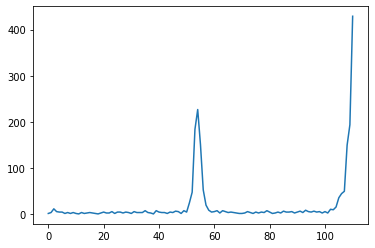

In [43]:
plt.plot(range(strand_len + 1), pos_counts)

In [44]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + ' -> ' + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_ -> T'])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 7, 41, 36, 13, 10, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 22, 9]


In [45]:
sub_keys = [get_key(sub[0], sub[1]) for sub in subs_no_pos]
max_10_keys = sub_keys[-10:]
max_10_counts = counts_no_pos[-10:]


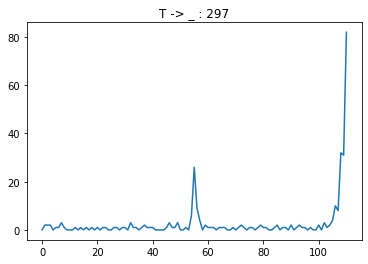

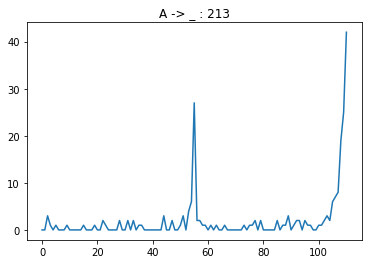

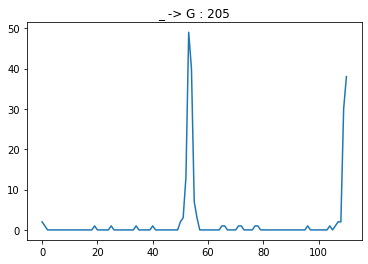

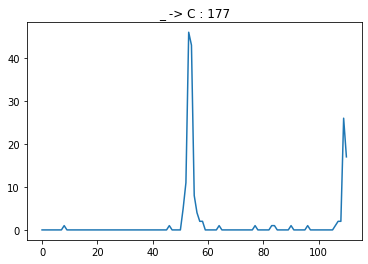

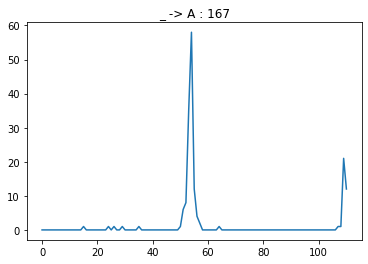

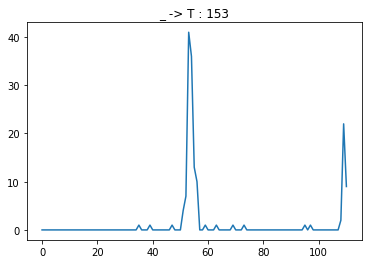

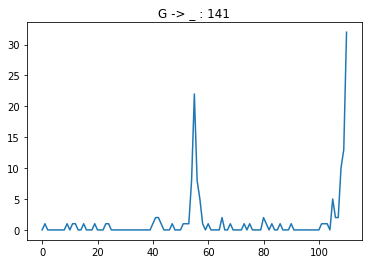

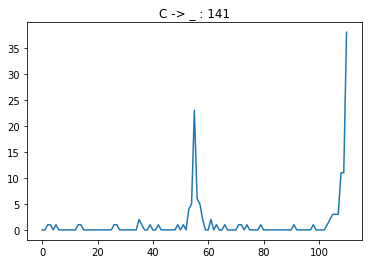

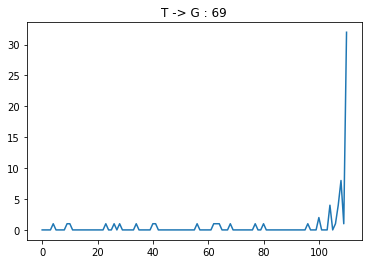

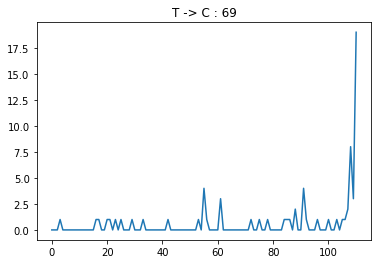

In [46]:
for key, count in zip(reversed(max_10_keys), reversed(max_10_counts)):
    plt.figure(key)
    plt.title(f'{key} : {count}')
    plt.plot(range(strand_len + 1), pos_map[key])

In [47]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)